In [1]:
!pip install tensorflow matplotlib pillow


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO


In [28]:
import os
os.listdir()


['.config',
 'images (2).jpg',
 'm7a0Bt (1).webp',
 'images (3) (1).jpg',
 'Image Feb 11, 2026, 09_31_38 PM.png',
 'different-types-of-painting.jpg',
 'images (3) (2).jpg',
 'm7a0Bt.webp',
 'Image Feb 11, 2026, 09_32_09 PM.png',
 'images (3).jpg',
 '32ad5253c9a3df5638f007a5f5.jpg',
 'sample_data']

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

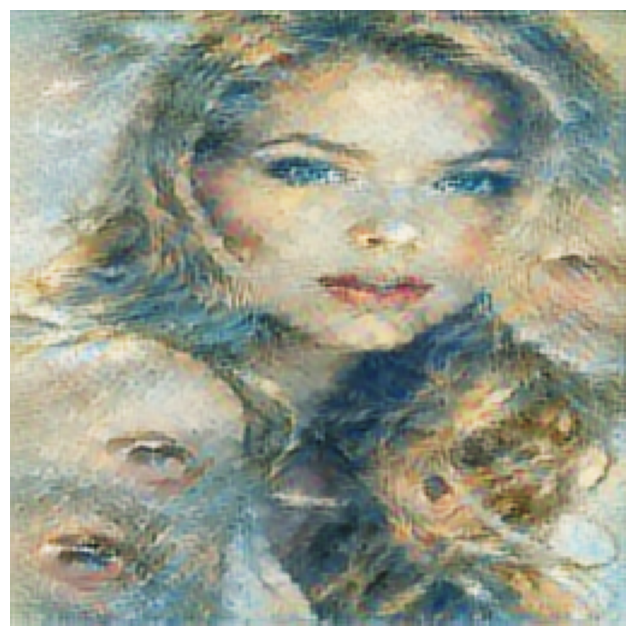

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (256, 256))
    img = img[tf.newaxis, :]
    return img

content_image = load_img("Image Feb 11, 2026, 09_31_38 PM.png")
style_image = load_img("Image Feb 11, 2026, 09_32_09 PM.png")

hub_model = hub.load(
    'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
)

stylized_image = hub_model(content_image, style_image)[0]
stylized_image = tf.clip_by_value(stylized_image, 0.0, 1.0)

plt.figure(figsize=(8,8))
plt.imshow(tf.squeeze(stylized_image))
plt.axis("off")


In [30]:
tf.keras.utils.save_img("stylized_output.png", tf.squeeze(stylized_image))
